In [1]:
from __future__ import annotations

import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
import sys

module_path = os.path.abspath(
    os.path.join("/Users/chatt07/Desktop/cqt_env/Quantum_Optimal_Control")
)
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path.append(
    os.path.abspath(
        os.path.join("/Users/chatt07/Desktop/cqt_env/Quantum_Optimal_Control")
    )
)

In [1]:
from template_configurations.qiskit.q_env_config import (
    q_env_config as gate_q_env_config,
    circuit_context,
)

/Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


Circuit context
global phase: π/2
                                                                    ┌───┐     »
      q_3 -> 0 ─────────────────────────────────────────────────────┤ X ├─────»
                                           ┌───┐     ┌───┐     ┌───┐└─┬─┘     »
      q_1 -> 1 ────────────────────────────┤ X ├─────┤ X ├──■──┤ X ├──■────■──»
                                           └─┬─┘     └─┬─┘  │  └─┬─┘     ┌─┴─┐»
      q_4 -> 2 ──────────────────────────────┼─────────┼────┼────┼───────┤ X ├»
               ┌─────────┐┌────┐┌─────────┐  │         │  ┌─┴─┐  │       └───┘»
      q_0 -> 3 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────■────■──┤ X ├──■────────────»
               └─────────┘└────┘└─────────┘       │       └───┘               »
ancilla_0 -> 4 ───────────────────────────────────┼───────────────────────────»
                                                ┌─┴─┐                         »
      q_2 -> 5 ─────────────────────────────────┤ X ├─────────────────────────»
      

In [2]:
from quantumenvironment import QuantumEnvironment
from context_aware_quantum_environment import ContextAwareQuantumEnvironment
from gymnasium.wrappers import RescaleAction, ClipAction

In [3]:
q_env = QuantumEnvironment(gate_q_env_config)
from qiskit.primitives import Estimator

# q_env = ContextAwareQuantumEnvironment(
#     gate_q_env_config, circuit_context, training_steps_per_gate=250
# )
# q_env.estimator = Estimator()
q_env = ClipAction(q_env)
q_env = RescaleAction(q_env, -1.0, 1.0)

In [4]:
from qiskit.quantum_info import Statevector, partial_trace
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.x(0)
qc.x(1)
print(Statevector.from_label("01"))
print(partial_trace(Statevector(qc), [2]))

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
DensityMatrix([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
              dims=(2, 2))


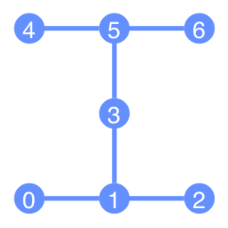

In [5]:
from qiskit.visualization import plot_gate_map

plot_gate_map(q_env.backend)

In [6]:
import yaml

with open(
        "/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/template_configurations/agent_config.yaml",
        "r",
) as f:
    agent_config = yaml.safe_load(f)

In [7]:
from ppo import make_train_ppo

ppo_agent = make_train_ppo(agent_config, q_env)

In [8]:
ppo_agent(total_updates=500, print_debug=True, num_prints=40)

 96%|█████████▌| 480/500 [01:49<00:04,  4.54it/s]

Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9894791223070369
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'XI', 'XZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 96%|█████████▌| 481/500 [01:49<00:04,  4.55it/s]

mean tensor([-0.0054, -0.2426,  0.7775, -0.4946,  0.4920, -0.4754, -0.4866])
sigma tensor([0.0175, 0.0368, 0.0277, 0.0135, 0.0179, 0.0191, 0.0165])
DFE Rewards Mean: 0.9969140346789387
DFE Rewards standard dev 0.008102977974354988
Returns Mean: 8.528436
Returns standard dev 4.1677155
Advantages Mean: 0.29999864
Advantages standard dev 4.1677155
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9898159901861875
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IY', 'XI', 'XY'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 96%|█████████▋| 482/500 [01:49<00:03,  4.57it/s]

mean tensor([-0.0132, -0.2787,  0.8013, -0.5314,  0.4897, -0.4667, -0.5002])
sigma tensor([0.0201, 0.0225, 0.0102, 0.0166, 0.0212, 0.0187, 0.0162])
DFE Rewards Mean: 0.9907778273864271
DFE Rewards standard dev 0.013588686004327685
Returns Mean: 6.7918844
Returns standard dev 3.95157
Advantages Mean: -0.8278408
Advantages standard dev 3.95157
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9919247845229546
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YZ', 'ZY'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 97%|█████████▋| 483/500 [01:50<00:04,  3.93it/s]

mean tensor([-0.0133, -0.2815,  0.7938, -0.5321,  0.4895, -0.4939, -0.4995])
sigma tensor([0.0188, 0.0292, 0.0153, 0.0151, 0.0181, 0.0203, 0.0153])
DFE Rewards Mean: 0.9913830535386354
DFE Rewards standard dev 0.012666390247316972
Returns Mean: 6.977524
Returns standard dev 4.081965
Advantages Mean: -0.6811799
Advantages standard dev 4.081965
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9909429179507363
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'XI', 'XZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 97%|█████████▋| 484/500 [01:50<00:03,  4.12it/s]

mean tensor([-0.0033, -0.2758,  0.7837, -0.5138,  0.4862, -0.5094, -0.4956])
sigma tensor([0.0162, 0.0385, 0.0286, 0.0138, 0.0170, 0.0193, 0.0169])
DFE Rewards Mean: 0.9978415542486013
DFE Rewards standard dev 0.006464326789580967
Returns Mean: 8.488218
Returns standard dev 4.007708
Advantages Mean: 0.32665405
Advantages standard dev 4.0077076
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9918960681136457
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IX', 'XI', 'XX'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 97%|█████████▋| 485/500 [01:50<00:03,  4.27it/s]

mean tensor([-0.0092, -0.2955,  0.7948, -0.5365,  0.5014, -0.4996, -0.5023])
sigma tensor([0.0172, 0.0297, 0.0161, 0.0174, 0.0206, 0.0168, 0.0167])
DFE Rewards Mean: 0.9940165390494079
DFE Rewards standard dev 0.011092321762573437
Returns Mean: 7.4060307
Returns standard dev 3.9998448
Advantages Mean: -0.401376
Advantages standard dev 3.9998448
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9920136121257822
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'YI', 'YZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 97%|█████████▋| 486/500 [01:50<00:03,  4.38it/s]

mean tensor([-0.0039, -0.2808,  0.7848, -0.5234,  0.5044, -0.5184, -0.4999])
sigma tensor([0.0134, 0.0358, 0.0232, 0.0152, 0.0161, 0.0208, 0.0148])
DFE Rewards Mean: 0.9948914685080202
DFE Rewards standard dev 0.010319855988493349
Returns Mean: 8.103645
Returns standard dev 4.2923675
Advantages Mean: -0.1699394
Advantages standard dev 4.2923675
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9922825544793474
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YX', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 97%|█████████▋| 487/500 [01:51<00:02,  4.46it/s]

mean tensor([-0.0223, -0.2951,  0.7963, -0.5312,  0.5087, -0.4934, -0.5039])
sigma tensor([0.0176, 0.0243, 0.0125, 0.0195, 0.0200, 0.0213, 0.0158])
DFE Rewards Mean: 0.9916066406886185
DFE Rewards standard dev 0.012443973641753453
Returns Mean: 6.888303
Returns standard dev 4.015464
Advantages Mean: -0.5232385
Advantages standard dev 4.015464
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9921607832131957
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j])


 98%|█████████▊| 488/500 [01:51<00:02,  4.52it/s]

mean tensor([-0.0213, -0.2938,  0.7923, -0.5227,  0.5112, -0.5006, -0.5101])
sigma tensor([0.0177, 0.0250, 0.0162, 0.0184, 0.0161, 0.0221, 0.0153])
DFE Rewards Mean: 0.991817960629872
DFE Rewards standard dev 0.014221836951361092
Returns Mean: 7.0844355
Returns standard dev 4.0437517
Advantages Mean: -0.48187807
Advantages standard dev 4.0437517
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9935232093701065
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j])


 98%|█████████▊| 489/500 [01:51<00:02,  4.51it/s]

mean tensor([ 0.0088, -0.2734,  0.7846, -0.4924,  0.5097, -0.5061, -0.5018])
sigma tensor([0.0171, 0.0295, 0.0240, 0.0156, 0.0126, 0.0240, 0.0125])
DFE Rewards Mean: 0.9979059249882183
DFE Rewards standard dev 0.007306446973156507
Returns Mean: 8.6717415
Returns standard dev 4.0554886
Advantages Mean: 0.6656119
Advantages standard dev 4.0554886
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9935731208610645
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'XI', 'XZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j])


 98%|█████████▊| 490/500 [01:51<00:02,  4.56it/s]

mean tensor([ 6.2631e-04, -2.7795e-01,  7.9047e-01, -4.9888e-01,  5.0458e-01,
        -5.1675e-01, -4.8638e-01])
sigma tensor([0.0195, 0.0234, 0.0201, 0.0184, 0.0167, 0.0258, 0.0157])
DFE Rewards Mean: 0.9967301053472964
DFE Rewards standard dev 0.008296403320057702
Returns Mean: 8.465449
Returns standard dev 4.156354
Advantages Mean: 0.72193605
Advantages standard dev 4.156354
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9941585502525312
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YX', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j])


 98%|█████████▊| 491/500 [01:51<00:01,  4.59it/s]

mean tensor([ 4.5262e-06, -3.0137e-01,  8.0190e-01, -5.1894e-01,  5.0557e-01,
        -5.1046e-01, -4.8630e-01])
sigma tensor([0.0185, 0.0189, 0.0128, 0.0222, 0.0170, 0.0218, 0.0183])
DFE Rewards Mean: 0.994594255212648
DFE Rewards standard dev 0.010286100023158778
Returns Mean: 7.6084366
Returns standard dev 4.0732255
Advantages Mean: 0.19211802
Advantages standard dev 4.0732255
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9942686257694511
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YZ', 'ZY'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 98%|█████████▊| 492/500 [01:52<00:01,  4.46it/s]

mean tensor([-0.0036, -0.3021,  0.7959, -0.5107,  0.5071, -0.5175, -0.4892])
sigma tensor([0.0165, 0.0198, 0.0164, 0.0195, 0.0159, 0.0226, 0.0170])
DFE Rewards Mean: 0.9938963144903837
DFE Rewards standard dev 0.009890956433908032
Returns Mean: 7.407776
Returns standard dev 4.037166
Advantages Mean: -0.30073982
Advantages standard dev 4.037166
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9938884880089578
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YX', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j])


 99%|█████████▊| 493/500 [01:52<00:01,  4.45it/s]

mean tensor([-0.0080, -0.3049,  0.8021, -0.5222,  0.5129, -0.5136, -0.4901])
sigma tensor([0.0166, 0.0174, 0.0132, 0.0195, 0.0160, 0.0195, 0.0168])
DFE Rewards Mean: 0.9933142778824218
DFE Rewards standard dev 0.010334006762674675
Returns Mean: 6.974245
Returns standard dev 3.8737261
Advantages Mean: -0.40041316
Advantages standard dev 3.873726
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9940224555619587
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IX', 'XI', 'XX'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 99%|█████████▉| 494/500 [01:52<00:01,  4.40it/s]

mean tensor([-0.0019, -0.3066,  0.7993, -0.5115,  0.5144, -0.5173, -0.4935])
sigma tensor([0.0157, 0.0208, 0.0167, 0.0187, 0.0137, 0.0211, 0.0159])
DFE Rewards Mean: 0.9945438292054445
DFE Rewards standard dev 0.010698590235716038
Returns Mean: 7.7737823
Returns standard dev 4.1498866
Advantages Mean: 0.33342865
Advantages standard dev 4.1498866
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9942090056022674
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])


 99%|█████████▉| 495/500 [01:53<00:01,  3.80it/s]

mean tensor([ 0.0099, -0.2961,  0.7905, -0.4923,  0.5028, -0.5139, -0.4917])
sigma tensor([0.0141, 0.0254, 0.0230, 0.0188, 0.0120, 0.0203, 0.0151])
DFE Rewards Mean: 0.9965758456007114
DFE Rewards standard dev 0.008920041368562249
Returns Mean: 8.3561325
Returns standard dev 4.0087695
Advantages Mean: 0.36020738
Advantages standard dev 4.0087695
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9937434613738345
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'XI', 'XZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 99%|█████████▉| 496/500 [01:53<00:00,  4.02it/s]

mean tensor([ 0.0116, -0.2944,  0.7926, -0.4950,  0.4983, -0.5075, -0.4891])
sigma tensor([0.0141, 0.0310, 0.0257, 0.0187, 0.0120, 0.0203, 0.0145])
DFE Rewards Mean: 0.9978714497815662
DFE Rewards standard dev 0.006515270832393372
Returns Mean: 8.753897
Returns standard dev 4.0410643
Advantages Mean: 0.481704
Advantages standard dev 4.0410647
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9936396772496475
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IY', 'XI', 'XY'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 99%|█████████▉| 497/500 [01:53<00:00,  4.18it/s]

mean tensor([-0.0068, -0.3203,  0.8138, -0.5308,  0.5137, -0.5030, -0.4900])
sigma tensor([0.0184, 0.0158, 0.0111, 0.0205, 0.0155, 0.0162, 0.0143])
DFE Rewards Mean: 0.9970084970988773
DFE Rewards standard dev 0.007045403152760931
Returns Mean: 8.275785
Returns standard dev 4.0042596
Advantages Mean: 0.69892955
Advantages standard dev 4.0042596
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9949474741363928
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IX', 'XI', 'XX'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


100%|█████████▉| 498/500 [01:53<00:00,  4.30it/s]

mean tensor([-0.0049, -0.3206,  0.8056, -0.5228,  0.5107, -0.5029, -0.4967])
sigma tensor([0.0162, 0.0176, 0.0161, 0.0191, 0.0157, 0.0152, 0.0134])
DFE Rewards Mean: 0.9969446980741348
DFE Rewards standard dev 0.00819395064581594
Returns Mean: 8.419748
Returns standard dev 4.1704497
Advantages Mean: 0.33295357
Advantages standard dev 4.1704497
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9938284322305664
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YX', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


100%|█████████▉| 499/500 [01:53<00:00,  4.38it/s]

mean tensor([-0.0066, -0.3262,  0.8103, -0.5302,  0.5128, -0.5002, -0.4932])
sigma tensor([0.0163, 0.0150, 0.0137, 0.0231, 0.0165, 0.0144, 0.0130])
DFE Rewards Mean: 0.9939399496424768
DFE Rewards standard dev 0.01181977702726037
Returns Mean: 7.73569
Returns standard dev 4.239231
Advantages Mean: -0.38689256
Advantages standard dev 4.239231
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9939688580677271
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IX', 'XI', 'XX'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


100%|██████████| 500/500 [01:54<00:00,  4.38it/s]

mean tensor([-0.0030, -0.3259,  0.8115, -0.5164,  0.5123, -0.5079, -0.5091])
sigma tensor([0.0172, 0.0165, 0.0148, 0.0240, 0.0160, 0.0144, 0.0171])
DFE Rewards Mean: 0.9944067172831077
DFE Rewards standard dev 0.010585928571967433
Returns Mean: 7.9636145
Returns standard dev 4.268366
Advantages Mean: -0.25271225
Advantages standard dev 4.268366


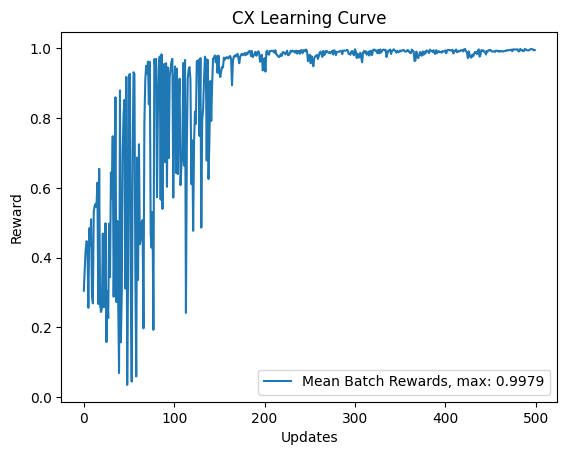

In [9]:
import numpy as np
import matplotlib.pyplot as plt

reward_history = np.array(q_env.reward_history)
mean_rewards = np.mean(reward_history, axis=-1)
max_mean = int(np.max(mean_rewards) * 1e4) / 1e4

plt.plot(mean_rewards, label=f"Mean Batch Rewards, max: {max_mean}")
plt.xlabel("Updates")
plt.ylabel("Reward")
plt.title("CX Learning Curve")
plt.legend()
plt.show()

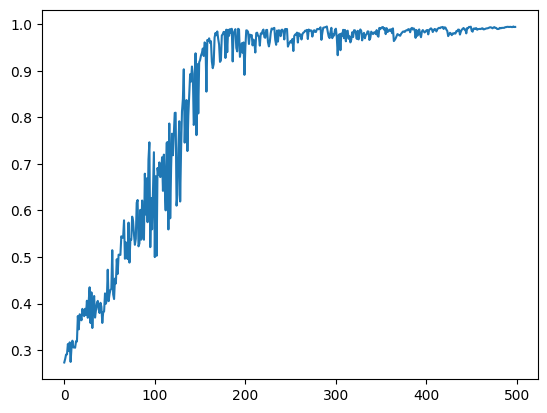

In [10]:
plt.plot(q_env.avg_fidelity_history)

In [11]:
q_env.reward_history[-1]

array([0.99472475, 0.97040169, 0.99227119, 1.00205527, 0.96765339,
       0.9982696 , 0.99934555, 1.00227315, 1.00692095, 0.9912093 ,
       0.96770958, 0.99752695, 0.99668459, 0.99826421, 1.0196347 ,
       1.00339174, 1.00332284, 0.99309654, 0.9950593 , 0.99356917,
       0.99934385, 1.01527247, 0.99151749, 0.97307096, 0.99663368,
       0.97321677, 0.98059434, 1.00243352, 1.00412146, 0.99471446,
       0.99990808, 1.00147495, 0.99348459, 0.99482797, 0.99462525,
       0.99183624, 0.97331891, 1.00287496, 1.01133812, 0.99690216,
       0.9964435 , 0.99271849, 0.99320788, 0.99230278, 0.99488625,
       0.98536584, 0.97865318, 1.00014467, 0.99857627, 1.00816364,
       1.00794538, 0.99166575, 0.98846085, 0.98357982, 1.00292494,
       0.98141195, 1.00158366, 0.99001597, 1.00535409, 0.98819395,
       0.98281658, 1.00194908, 0.99832761, 0.99940622, 1.00248518,
       1.00558442, 0.99492202, 0.99427979, 0.98714457, 0.99474795,
       1.01845935, 0.9973646 , 0.99087317, 1.01365709, 1.00129